In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Importar o ficheiro
df = pd.read_csv('C:\\Users\\guilh\\Desktop\\AASE\\Projeto\\csv\\train.csv', sep=";", header=0)

In [3]:
                        #BRAND
#Como é possível verificar no gráfico de barras, a maior queda de valores é entre chevrolet para porshe. Portanto, vamos considerar os valores "Ford", "BMW", "Mercedes" e "Chevorlet", os outros valores vão ser populados com "Outro"
allowed_brands = ['Ford', 'Mercedes-Benz', 'BMW', 'Chevrolet']
df['brand'] = df['brand'].apply(lambda x: x if x in allowed_brands else 'Other')

In [4]:
                        #MODEL
#Como vimos na matriz da correlação, a marca não interfere no preço do automóvel, pelo que pode ser removida.
#drop the model column
df.drop('model', axis = 1, inplace = True)

In [5]:
                        #MODEL_YEAR
#Dividimos as datas tipo-  2000-2005 | 2005-2010 ... ?????
                 

In [6]:
                        #MILAGE
#Alterar o tipo da coluna para numero e converter de milhas para kilometros, para melhor compreensão.

# Alterar a coluna milage para float e depois converter para km
df['milage'] = df['milage'].str.split(" ", expand = True)[0].str.replace(',', '').astype(float)


# converter milhas para kilometros
mile_to_km = 0.621371
df['kilometers'] = df['milage'] / mile_to_km

# Arredondar os valores em 2 casas decimais
df['kilometers'] = df['kilometers'].round(0).astype(int)


In [7]:
                        #FUEL TYPE

# Juntar os hibridos todos, 
df.loc[df['fuel_type'].str.contains('Hybrid', na=False), 'fuel_type'] = 'Hybrid'
df.loc[df['fuel_type'].str.contains('–', na=False), 'fuel_type'] = 'No data'
df.loc[df['fuel_type'].str.strip() == '', 'fuel_type'] = 'No data'
df.loc[df['fuel_type'] == 'not supported', 'fuel_type'] = 'Hydrogen' # (só existe um carro com este valor: Toyota -Mirai Limited, movido a hidrogénio)
# Todos os valores que estão nulos são eletricos
df['fuel_type'].fillna('Eletric', inplace=True)


In [8]:
                    #ENGINE

#Separar os valores do motor em "Horsepower", "Cilinders" and "Litres"
split_engine = df['engine'].str.split(' ',expand = True)

split_engine.loc[split_engine[0].str.contains('HP'), 'horsepower'] = split_engine.loc[split_engine[0].str.contains('HP'), 0].str.replace('HP', "").astype(float)
split_engine.loc[(split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('L')), 'litres'] = split_engine.loc[(split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('L')), 1].str.replace('L', "").astype(float)
split_engine.loc[split_engine[0].str.contains('HP') & (split_engine[3] == 'Cylinder'), 'cylinders'] = split_engine.loc[split_engine[0].str.contains('HP') & (split_engine[3] == 'Cylinder'), 2].str.replace('V', "").astype(int)
split_engine.loc[split_engine[0].str.contains('HP') & (split_engine[3] == '6'), 'cylinders'] = 6

split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[0].str.contains('L')), 'litres'] = pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[0].str.contains('L')), 0].str.replace('L', ''), errors = 'coerce')
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[0].str.contains('V')) & (split_engine['cylinders'].isnull()), 'cylinders'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[0].str.contains('V'))][0].str.replace('V', ''), errors = 'coerce'))


split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('L')), 'litres'] = pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('L')), 1].str.replace('L', ''), errors = 'coerce')
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('I')), 'cylinders'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('I'))][1].str.replace('I', '')))
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('H')), 'cylinders'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('H'))][1].str.replace('H', ''), errors = 'coerce'))
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('W')), 'cylinders'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('W'))][1].str.replace('W', ''), errors = 'coerce'))
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('V')), 'cylinders'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('V'))][1].str.replace('V', ''), errors = 'coerce'))
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].isin([str(x) for x in list(range(20))])), 'cylinders'] = split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].isin([str(x) for x in list(range(20))]))][1].astype(float)

split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[2].str.contains('V')) & (split_engine['cylinders'].isnull()), 'cylinders'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[2].str.contains('V')) & (split_engine['cylinders'].isnull())][2].str.replace('V', '')))
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[2].str.contains('I')) & (split_engine['cylinders'].isnull()), 'cylinders'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[2].str.contains('I')) & (split_engine['cylinders'].isnull())][2].str.replace('I', ''), errors = 'coerce'))
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[2].str.contains('L')) & (split_engine['cylinders'].isnull()), 'litres'] = split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[2].str.contains('L')) & (split_engine['cylinders'].isnull())][2].str.replace('L', '').astype(float)


split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[3].str.contains('V')) & (split_engine['cylinders'].isnull()), 'cylinders'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[3].str.contains('V')) & (split_engine['cylinders'].isnull())][3].str.replace('V', ''), errors = 'coerce'))

split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[4].str.contains('I')) & (split_engine['cylinders'].isnull()), 'cylinders'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[4].str.contains('I')) & (split_engine['cylinders'].isnull())][4].str.replace('I', ''), errors = 'coerce'))
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[4].str.contains('V')) & (split_engine['cylinders'].isnull()), 'cylinders'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[4].str.contains('V')) & (split_engine['cylinders'].isnull())][4].str.replace('V', ''), errors = 'coerce'))

split_engine.loc[(split_engine[1] == 'Liter') & (split_engine['litres'].isnull()), 'litres'] = split_engine.loc[(split_engine[1] == 'Liter') & (split_engine['litres'].isnull())][0].astype(float)

df = pd.concat([df, split_engine[['horsepower', 'litres', 'cylinders']]], axis = 1)



df[['engine', 'horsepower', 'litres', 'cylinders']].head(100)

,engine,horsepower,litres,cylinders
0,285.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,285.0,3.6,6.0
1,270.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,270.0,3.5,6.0
2,208.0HP 2.5L 4 Cylinder Engine Gas/Electric Hy...,208.0,2.5,4.0
3,260.0HP 2.4L 4 Cylinder Engine Gasoline Fuel,260.0,2.4,4.0
4,301.0HP 4.6L 8 Cylinder Engine Gasoline Fuel,301.0,4.6,8.0
...,...,...,...,...
95,449.0HP 4.7L 8 Cylinder Engine Gasoline Fuel,449.0,4.7,8.0
96,175.0HP 3.9L V6 Cylinder Engine Gasoline Fuel,175.0,3.9,6.0
97,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,420.0,6.2,8.0
98,420.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,420.0,4.2,8.0


In [9]:
                #ENGINE
#substituimos os valores nulos pela media dos valores
#df['horsepower'].fillna(df['horsepower'].mean(), inplace = True)
#df['litres'].fillna(df['litres'].mean(), inplace = True)
#df['cylinders'].fillna(df['cylinders'].mean(), inplace = True)


In [10]:
# TRANSMISSION
# Vamos manter apenas "Automatic", "Manual", "DCT", "No data"
df['transmission'] = df['transmission'].str.lower()

df.loc[df['transmission'].str.contains('automatic|a/t|at|auto|cvt'), 'transmission'] = 'Automatic'
df.loc[df['transmission'].str.contains('m/t|manual|mt'), 'transmission'] = 'Manual'
df.loc[df['transmission'].str.contains('dual shift mode'), 'transmission'] = 'DCT'
df.loc[df['transmission'].str.contains('–|2|f|7-speed|variable'), 'transmission'] = 'No data'

# Preencher valores nulos com 'No data'
df['transmission'].fillna('No data', inplace=True)


In [11]:
                #EXT_COLOR
# Substituir todos os valores que não são "white" ou "black" por "other"
# Substituir 'beige' por 'beige'
df.loc[df['int_col'].str.contains('White', case=False), 'int_col'] = 'White'

# Substituir 'black' por 'black'
df.loc[df['int_col'].str.contains('Black', case=False), 'int_col'] = 'Black'


df.loc[~df['ext_col'].isin(['White', 'Black']), 'ext_col'] = 'Other'

In [12]:
                #INT_COLOR
# Substituir todos os valores que não são "white" ou "black" por "other"

# Substituir os valores baseados em palavras-chave

# Substituir 'beige' por 'beige'
df.loc[df['int_col'].str.contains('Beige', case=False), 'int_col'] = 'Beige'

# Substituir 'black' por 'black'
df.loc[df['int_col'].str.contains('Black', case=False), 'int_col'] = 'Black'

# Substituir 'gray' por 'gray'
df.loc[df['int_col'].str.contains('Gray', case=False), 'int_col'] = 'Gray'

df.loc[~df['int_col'].isin(['Beige', 'Black', "Gray"]), 'int_col'] = 'Other'

In [13]:
                #CLEAN_TITLE
# Substituir os valores ausentes na coluna 'clean_title' por "No data"
df['clean_title'].fillna("No data", inplace=True)


In [14]:
                #ACCIDENT
# Substituir os valores ausentes na coluna 'clean_title' por "No data"
df['accident'].fillna("No data", inplace=True)

In [15]:
#------------------------------------------REMOVER OUTLIERS---------------------------------------------------
#kilometers
#model_year
#horsepower
#litres
#cilynders
#price
#use IQR value to filter out the outliers from price

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['price'] < (Q1 - 1.5 * IQR)) |(df['price'] > (Q3 + 0.4 * IQR)))]


In [16]:
df.shape

(2682, 15)

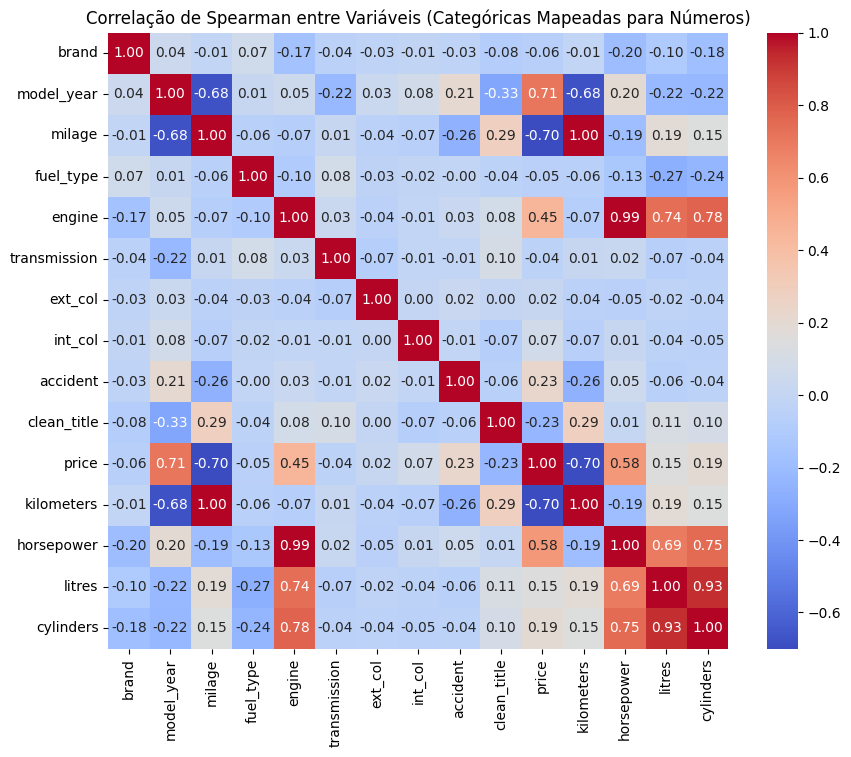

In [17]:
from sklearn.preprocessing import LabelEncoder

# Seleciona apenas as colunas não numéricas
categorical_columns = df.select_dtypes(include='object').columns

# Inicializa o LabelEncoder
label_encoder = LabelEncoder()

# Mapeia as categorias para números
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Calcule a matriz de correlação de Spearman
correlation_matrix = df.corr(method='spearman')

# Visualize a matriz de correlação usando um heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação de Spearman entre Variáveis (Categóricas Mapeadas para Números)')
plt.show()


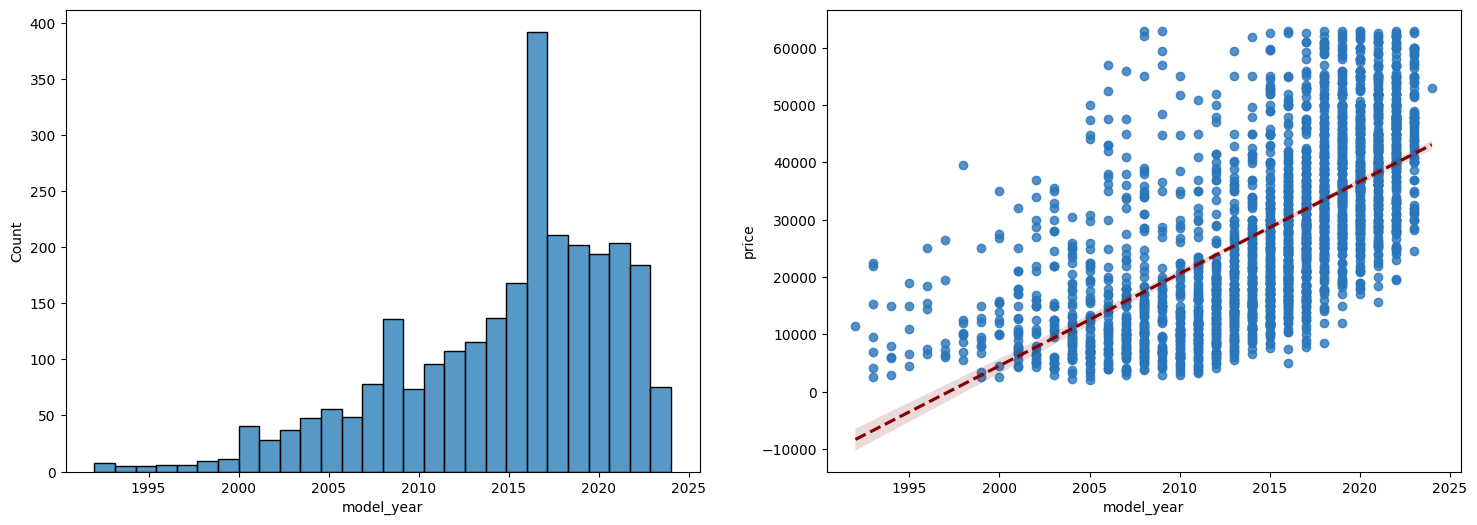

In [18]:
#If we contrast the year of the model with the price, we can see that a positive correlation exist between these two features. In general, the higher the year of the model, the higher the price will be.
fig, axes = plt.subplots(1,2, figsize = (18,6))

sns.histplot(data = df['model_year'], ax = axes[0])
sns.regplot(data = df, x = 'model_year', y = 'price', color = 'red',
            scatter_kws = {'color': sns.xkcd_rgb['bluish']},
            line_kws = {'color': sns.xkcd_rgb['dark red'], 'linestyle': '--'}, ax = axes[1])


plt.show()



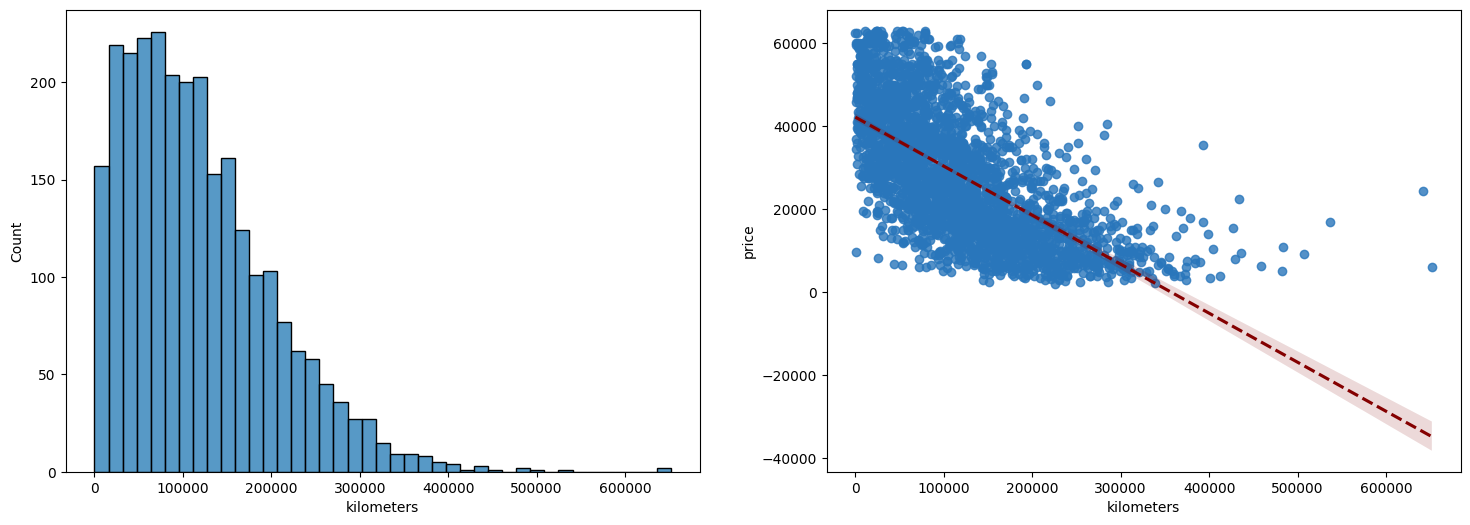

In [19]:
#As we can expect, we can see that a higher milage means a lower price. Naturally, a car that has a lot of milage probably does not have good efficiency or it is in the best condition, so the price must be lower to be more attractive for sale.

fig, axes = plt.subplots(1,2, figsize = (18,6))

sns.histplot(data = df['kilometers'], ax = axes[0])
sns.regplot(data = df, x = 'kilometers', y = 'price', color = 'red',
            scatter_kws = {'color': sns.xkcd_rgb['bluish']},
            line_kws = {'color': sns.xkcd_rgb['dark red'], 'linestyle': '--'}, ax = axes[1])

plt.show()



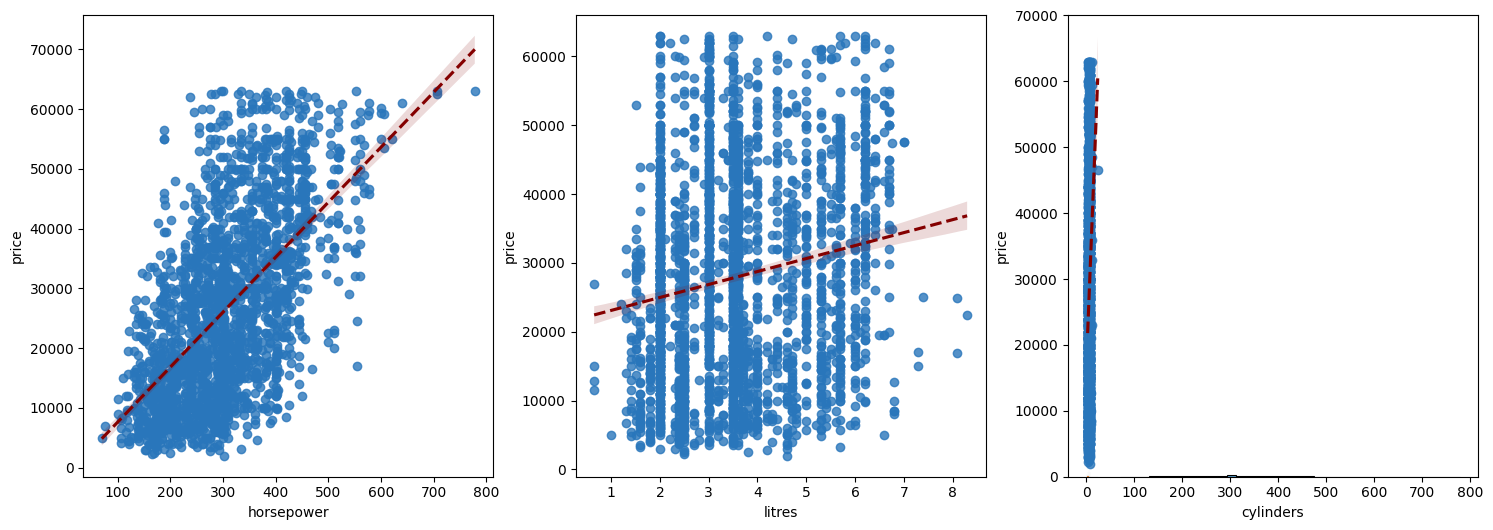

In [20]:
#From all the engine features, we see that horsepower holds the best correlation with the price, which we can see is positive. The other features don't give us much insight in relation to price.

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for 'horsepower'
sns.histplot(data=df['horsepower'], ax=axes[2])
sns.regplot(data=df, x='horsepower', y='price', color='red',
            scatter_kws={'color': sns.xkcd_rgb['bluish']},
            line_kws={'color': sns.xkcd_rgb['dark red'], 'linestyle': '--'}, ax=axes[0])

# Plot for 'litres'
sns.histplot(data=df['litres'], ax=axes[2])
sns.regplot(data=df, x='litres', y='price', color='red',
            scatter_kws={'color': sns.xkcd_rgb['bluish']},
            line_kws={'color': sns.xkcd_rgb['dark red'], 'linestyle': '--'}, ax=axes[1])

# Plot for 'cylinders'
sns.histplot(data=df['cylinders'], ax=axes[2])
sns.regplot(data=df, x='cylinders', y='price', color='red',
            scatter_kws={'color': sns.xkcd_rgb['bluish']},
            line_kws={'color': sns.xkcd_rgb['dark red'], 'linestyle': '--'}, ax=axes[2])

plt.show()

In [21]:
# MODELING

In [22]:
# Change to classification
df = df.dropna();

In [23]:
df['price'].mean()

26104.413156649312

In [24]:
import pandas as pd

# Substitua 'coluna_preco' pelo nome real da coluna de preços em seu conjunto de dados
df['price_type'] = pd.qcut(df['price'], q=[i/50 for i in range(51)], labels=[f'Category {i}' for i in range(1, 51)])

# Visualize as categorias criadas e seus valores mínimos e máximos
categories_summary = df.groupby('price_type')['price'].agg(['min', 'max'])
print(categories_summary)


               min    max
price_type               
Category 1    2000   4500
Category 2    4700   5800
Category 3    5900   6500
Category 4    6600   7200
Category 5    7300   8000
Category 6    8200   8950
Category 7    8995   9750
Category 8    9800  10200
Category 9   10300  11000
Category 10  11200  11999
Category 11  12000  12500
Category 12  12749  13000
Category 13  13200  14000
Category 14  14200  15000
Category 15  15100  15500
Category 16  15550  16000
Category 17  16100  16900
Category 18  16975  17500
Category 19  17599  18000
Category 20  18200  18995
Category 21  18999  19800
Category 22  19900  20850
Category 23  20900  21499
Category 24  21500  22000
Category 25  22222  23500
Category 26  23600  24500
Category 27  24700  25000
Category 28  25221  26500
Category 29  26600  27500
Category 30  27700  28500
Category 31  28600  29500
Category 32  29600  30000
Category 33  30490  31450
Category 34  31500  32500
Category 35  32600  33885
Category 36  33900  34999
Category 37 

C:\Users\guilh\AppData\Local\Temp\ipykernel_17372\924215571.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  categories_summary = df.groupby('price_type')['price'].agg(['min', 'max'])


In [25]:
import warnings
warnings.filterwarnings("ignore")

In [26]:

from sklearn.metrics import (
        make_scorer,
        confusion_matrix, 
        cohen_kappa_score, 
        accuracy_score, 
        precision_score, 
        recall_score, 
        f1_score, 
        roc_auc_score
)
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier # decision trees for classification
from sklearn.neural_network import  MLPClassifier # neural networks for classification
from sklearn.naive_bayes import GaussianNB # naive bayes for classification
from sklearn.svm import SVC # support vector machines for classification

In [27]:
def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn+fp)

In [28]:
METRICS = {
    "accuracy": make_scorer(accuracy_score),
    "precision": make_scorer(precision_score, average='weighted'),
    "recall": make_scorer(recall_score, average='weighted'),
    "f1": make_scorer(f1_score, average='weighted'),
    "AUC": make_scorer(roc_auc_score, needs_proba=True, multi_class='ovr', average='weighted'),
    "specificity": make_scorer(specificity_score),
    "kappa": make_scorer(cohen_kappa_score)
}


In [29]:
X, y = df.drop("price_type", axis=1), df["price_type"]

In [30]:
dt = DecisionTreeClassifier(max_depth=100, random_state=1234)
splitter = StratifiedKFold(10, random_state=1234, shuffle=True)
scores = cross_validate(dt, X, y, cv=splitter, scoring=METRICS)
dt_scores = pd.DataFrame(scores)
pd.DataFrame(dt_scores.mean()).T

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,test_AUC,test_specificity,test_kappa
0,0.038667,0.065341,0.989113,0.991003,0.989113,0.988879,0.994436,NaN,0.988883


In [31]:
nn = MLPClassifier(hidden_layer_sizes=(50,50), max_iter=20, random_state=1234)
scores_nn = cross_validate(nn, X, y, cv=splitter, scoring=METRICS)
nn_scores = pd.DataFrame(scores_nn)
pd.DataFrame(nn_scores.mean()).T

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,test_AUC,test_specificity,test_kappa
0,0.555059,0.091093,0.046841,0.025953,0.046841,0.02465,0.738426,NaN,0.027279


In [32]:
nb = GaussianNB()
scores_nb = cross_validate(nb, X, y, cv=splitter, scoring=METRICS)
nb_scores = pd.DataFrame(scores_nb)
pd.DataFrame(nb_scores.mean()).T

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,test_AUC,test_specificity,test_kappa
0,0.015153,0.079897,0.925706,0.938178,0.925706,0.922524,0.99928,NaN,0.924139


In [33]:
svm = SVC(random_state=1234, probability=True)
scores_svm = cross_validate(svm, X, y, cv=splitter, scoring=METRICS)
svm_scores = pd.DataFrame(scores_svm)
pd.DataFrame(svm_scores.mean()).T

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,test_AUC,test_specificity,test_kappa
0,2.962945,0.355426,0.064359,0.011126,0.064359,0.01767,0.792291,NaN,0.041529
